In [1]:
import sys
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.metropol import Metropol
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

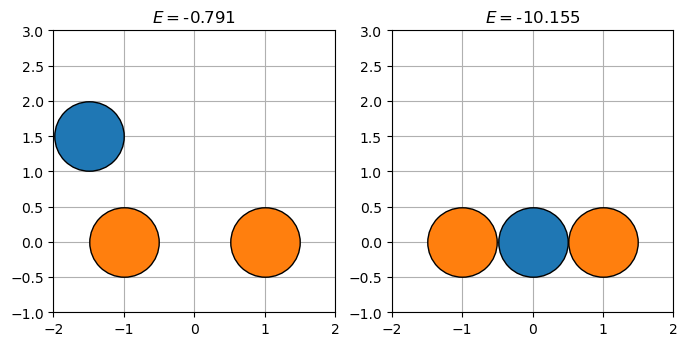

In [2]:
fig, axs = plt.subplots(1,2,figsize=(8,4))


colors = ["C0", "C1", "C1"]
atomlist = []
positions = [np.array([-1.5,1.5]), np.array([-1.0,0.0]), np.array([1.0,0.0])]
for color, position in zip(colors, positions):
    atom = Atom(position=position, color=color)
    atomlist.append(atom)

atom_col1 = Atom_Collection(atomlist=atomlist)
atom_col1.calculator = LennardJones()
atomlist = []
positions = [np.array([0.0,0.0]), np.array([-1.0,0.0]), np.array([1.0,0.0])]
for color, position in zip(colors, positions):
    atom = Atom(position=position, color=color)
    atomlist.append(atom)

atom_col2 = Atom_Collection(atomlist=atomlist)
atom_col2.calculator = LennardJones()
atom_cols = [atom_col1, atom_col2]

for ax, atom_col in zip(axs, atom_cols):
    ax.set_xlim([-2.0,2.0])
    ax.set_ylim([-1.0,3.0])
    ax.set_aspect("equal")
    E = atom_col.get_potential_energy()
    ax.set_title(rf"$E=${E.round(3)}")
    atom_col.plot(ax=ax)
    ax.grid()

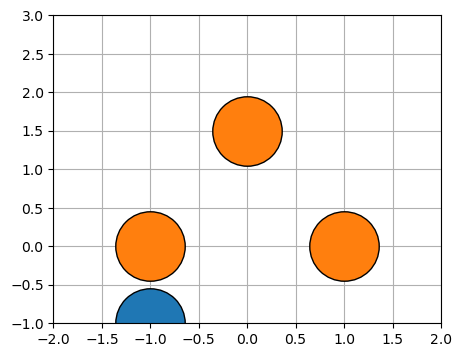

In [11]:
atomlist = []
positions = [np.array([-1.0,-1.0]), np.array([-1.0,0.0]), np.array([1.0,0.0]), np.array([0.0, 1.5])]
colors = ["C0", "C1", "C1", "C1"]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-1.0,3.0])
for position, color in zip(positions, colors):
    atom = Atom(position=position, color=color)
    atomlist.append(atom)
ax.grid()
atom_col = Atom_Collection(atomlist=atomlist)
atom_col.calculator = LennardJones()
atom_col.plot(ax=ax)
E_lim = 5.0
xs = np.linspace(-2.0, 2.0, 200)
ys = np.linspace(-2.0, 2.0, 200)
energies = np.zeros(shape=(len(ys), len(xs)))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        atom_col.set_atom_pos(index=0, pos=np.array([x, y]))
        E = atom_col.get_potential_energy()
        if E > E_lim:
            energies[j][i] = E_lim #WE SET LARGE VALUES TO CAP AT E_lim
        else:
            energies[j][i] = E
atom_col[0].pos = positions[0]

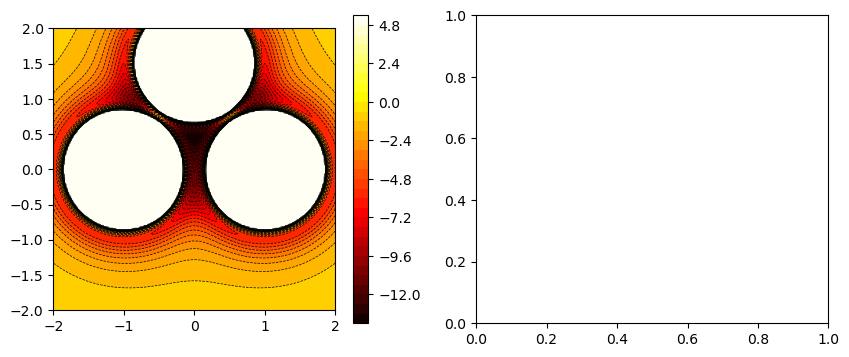

In [12]:
fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].set_xlim([-2.0,2.0])
#axs[0].set_ylim([-3.0,3.0])
#for ax in axs:
#    pass
axs[0].set_aspect("equal")
Xi, Yi = np.meshgrid(xs, xs)
axs[0].contour(Xi, Yi, energies, levels=30, linewidths=0.5, colors='k')
cntr1 = axs[0].contourf(Xi, Yi, energies, levels=30, cmap="hot")
fig.colorbar(cntr1, ax=axs[0])

In [13]:
atoms_for_freeze = [1,2,3]
atom_col.freeze_atoms(indices=atoms_for_freeze)
optimizer = Metropol(atom_col=atom_col, T=0.05, step_size=0.2)
path_cols = optimizer.run(E_limit=-15.5, N_max=200, track=True)
print(path_cols)

[<classes.atoms.Atom_Collection object at 0x0000029AAF00B6D0>, <classes.atoms.Atom_Collection object at 0x0000029AAEE49210>, <classes.atoms.Atom_Collection object at 0x0000029AAF464990>, <classes.atoms.Atom_Collection object at 0x0000029AAF179650>, <classes.atoms.Atom_Collection object at 0x0000029AAF4A29D0>, <classes.atoms.Atom_Collection object at 0x0000029AACC20310>, <classes.atoms.Atom_Collection object at 0x0000029AAF34DD10>, <classes.atoms.Atom_Collection object at 0x0000029AAF30B610>, <classes.atoms.Atom_Collection object at 0x0000029AAE65EF90>, <classes.atoms.Atom_Collection object at 0x0000029AAF481B50>, <classes.atoms.Atom_Collection object at 0x0000029AAF45DED0>, <classes.atoms.Atom_Collection object at 0x0000029AAF199A50>, <classes.atoms.Atom_Collection object at 0x0000029AAF166790>, <classes.atoms.Atom_Collection object at 0x0000029AAF197BD0>, <classes.atoms.Atom_Collection object at 0x0000029AAF4AF790>, <classes.atoms.Atom_Collection object at 0x0000029AAF4AFC10>, <classe

In [14]:
path = np.zeros(shape=(len(path_cols), 2))
for i,col in enumerate(path_cols):
    atom = col[0]
    path[i] = atom.pos

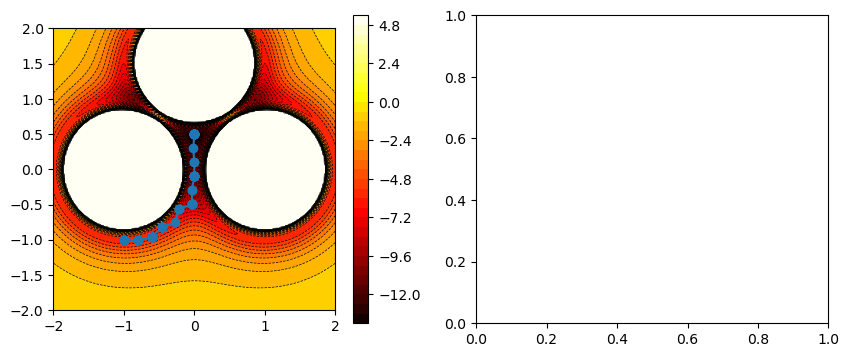

In [15]:
axs[0].plot(path[:,0], path[:,1], "o-")
fig